In [3]:
# -------------------------------------------
# Mount Drive → Load CSV → Cluster → Compare (Optimized & Fixed)
# -------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load cleaned CSV from your Drive (update path if needed)
file_path = "/content/drive/MyDrive/Colab Notebooks/Crime_Data_from_2020_to_Present.csv"
df = pd.read_csv(file_path)
print(f"Loaded full dataset: {df.shape}")

# -------------------------------------------
# Sample for clustering to prevent crashing
# -------------------------------------------
sample_df = df[['LAT', 'LON']].dropna().sample(n=20000, random_state=42).copy()

# Scale location data
scaler = StandardScaler()
location_scaled = scaler.fit_transform(sample_df[['LAT', 'LON']])

# KMeans Clustering on sample
kmeans = KMeans(n_clusters=6, random_state=42, n_init='auto')
sample_df['KMeans_Cluster'] = kmeans.fit_predict(location_scaled)

# Agglomerative Clustering on sample
agglo = AgglomerativeClustering(n_clusters=6)
sample_df['Agglo_Cluster'] = agglo.fit_predict(location_scaled)

# -------------------------------------------
# Results Summary
# -------------------------------------------
print("\n--- KMeans Clustering on 20K sample ---")
print(sample_df['KMeans_Cluster'].value_counts().sort_index())
print(f"Silhouette Score (KMeans): {silhouette_score(location_scaled, sample_df['KMeans_Cluster']):.4f}")

print("\n--- Agglomerative Clustering on 20K sample ---")
print(sample_df['Agglo_Cluster'].value_counts().sort_index())
try:
    sil_agglo = silhouette_score(location_scaled, sample_df['Agglo_Cluster'])
    print(f"Silhouette Score (Agglomerative): {sil_agglo:.4f}")
except Exception as e:
    print(f"Silhouette Score (Agglomerative): Not available — {e}")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded full dataset: (1005091, 28)

--- KMeans Clustering on 20K sample ---
KMeans_Cluster
0    5375
1      42
2    5646
3     818
4    5173
5    2946
Name: count, dtype: int64
Silhouette Score (KMeans): 0.4506

--- Agglomerative Clustering on 20K sample ---
Agglo_Cluster
0    8808
1    4466
2    3324
3      42
4     876
5    2484
Name: count, dtype: int64
Silhouette Score (Agglomerative): 0.4777


Model Comparison Table:


,Model,Silhouette Score,Number of Clusters,Largest Cluster Size,Smallest Cluster Size
0,KMeans,0.4506,6,5646,42
1,Agglomerative,0.4777,6,8808,42


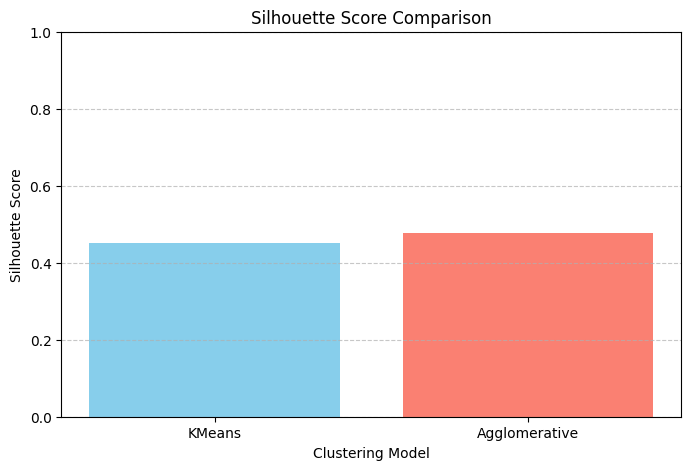

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Create model comparison data
comparison_data = {
    'Model': ['KMeans', 'Agglomerative'],
    'Silhouette Score': [0.4506, 0.4777],
    'Number of Clusters': [6, 6],
    'Largest Cluster Size': [5646, 8808],
    'Smallest Cluster Size': [42, 42]
}

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Display the table
print("Model Comparison Table:")
display(comparison_df)

# Create bar chart for Silhouette Score comparison
plt.figure(figsize=(8, 5))
plt.bar(comparison_df['Model'], comparison_df['Silhouette Score'], color=['skyblue', 'salmon'])
plt.title('Silhouette Score Comparison')
plt.ylabel('Silhouette Score')
plt.xlabel('Clustering Model')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
